# Playing with Eric Jonas Dataset

In [1]:
import pickle
import netdataio
import graph_conv_many_nuc_util
import torch
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools

In [400]:
filename = 'graph_conv_many_nuc_pipeline.datasets/graph_conv_many_nuc_pipeline.data.13C.nmrshiftdb_hconfspcl_nmrshiftdb.aromatic.64.0.mol_dict.pickle'
data = pickle.load(open(filename, 'rb'))

In [401]:
hparams = graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

In [402]:
graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

{'feat_vect_args': {'feat_atomicno_onehot': [1, 6, 7, 8, 9, 15, 16, 17],
  'feat_pos': False,
  'feat_atomicno': True,
  'feat_valence': True,
  'aromatic': True,
  'hybridization': True,
  'partial_charge': False,
  'formal_charge': True,
  'r_covalent': False,
  'total_valence_onehot': True,
  'r_vanderwals': False,
  'default_valence': True,
  'rings': True},
 'feat_mat_args': {'feat_distances': False, 'feat_r_pow': None},
 'adj_args': {'edge_weighted': False,
  'norm_adj': True,
  'add_identity': True,
  'split_weights': [1, 1.5, 2, 3]}}

In [403]:
len(data['train_df'])

21523

In [407]:
mols_dict = {}
for i in data['train_df']['rdmol']:
    if i not in mols_dict:
        mols_dict[i] = 1
    else:
        mols_dict[i] += 1

In [408]:
mols_dict_ordered = {k: v for k, v in sorted(mols_dict.items(), key=lambda item: item[1], reverse = False)}

In [409]:
mols_count = {}
for i in mols_dict_ordered:
    if mols_dict_ordered[i] not in mols_count:
        mols_count[mols_dict_ordered[i]]=1
    else: 
        mols_count[mols_dict_ordered[i]]+=1

In [410]:
mols_count

{1: 19071, 2: 974, 3: 140, 4: 17, 5: 2, 6: 1}

In [411]:
mols_count.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [412]:
mols_count.values()

dict_values([19071, 974, 140, 17, 2, 1])

### Distribution of dupilcates per molecule

In [7]:
bonds = []
for i in d['train_df']['rdmol']:
    bonds.append(i.GetNumBonds())

In [9]:
max(bonds)*2

140

In [208]:
d['train_df']['value'][0]

[{15: 193.4,
  11: 203.0,
  2: 33.5,
  14: 33.5,
  1: 41.8,
  6: 26.5,
  10: 17.6,
  8: 140.99,
  0: 18.3,
  4: 42.0,
  7: 158.3,
  12: 22.6,
  5: 31.7,
  3: 42.2,
  9: 78.34}]

In [9]:
d['MAX_N']

64

In [10]:
d['spectra_config']

[('13C', 'dataset.named/spectra.nmrshiftdb_13C.feather')]

In [11]:
d['tgt_nucs']

['13C']

In [12]:
train_df = d['train_df']
tgt_nucs = d['tgt_nucs']
test_df = d['test_df'] #.sample(10000, random_state=10)

In [13]:
MAX_N = d['MAX_N']

datasets = {}

for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

### Looking at adjacency matrices

In [219]:
len(datasets['train'][0])

5

In [222]:
adj = datasets['train'][0][0]

In [225]:
adj[0]

tensor([[0.2000, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [226]:
adj[1]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [227]:
adj[2]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [229]:
print(adj[3])

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [231]:
torch.set_printoptions(profile="full")
print(adj[3][0])
torch.set_printoptions(profile="default")

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [237]:
for i in range(len(adj[0])):
    for j in range(len(adj[0][i])):
        if j != i and adj[0][i][j] != 0:
            print(adj[0][i], i)

tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 0
tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.000

In [19]:
for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

In [20]:
datasets['train']

In [25]:
len(datasets['test'])

5390

In [21]:
dl_train = torch.utils.data.DataLoader(datasets['train'], batch_size=16, 
                                           shuffle=True,pin_memory=True)

In [70]:
dl_train

In [73]:
dataiter = iter(dl_train)
data = dataiter.next()

In [74]:
len(data)

5

In [75]:
data[0]

tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.2500, 0.2500, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0

In [76]:
data[1]

tensor([[[6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

# Playing around with original dataset

In [20]:
suppl2 = Chem.SDMolSupplier('nmrshiftdb2withsignals.sd', removeHs=False)

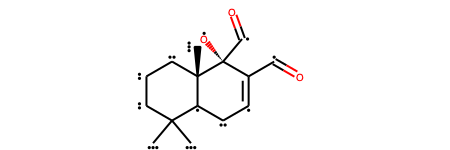

In [21]:
suppl2[0]

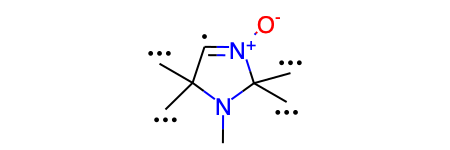

In [22]:
suppl2[2]

In [23]:
from rdkit.Chem import PandasTools
df = PandasTools.LoadSDF('nmrshiftdb2withsignals.sd',smilesName='SMILES',molColName='Molecule',
                         includeFingerprints=True)

RDKit WARNING: [21:17:26] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:17:26] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 27 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 27 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 31 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 30 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 30 ignored.
RDKit WARNING: [21:17:27] Warning: conflicting stereochemistry at atom 31 ignored.
RDKit WARNING: [21:17:28] Warning: conflicting stereochemistry at atom 13 ignored.
RDKit WARNING: [21:17:28] Warning: conflicting stereochemistry at atom 13 ignored.
RDKit WARNING: [21:17:28] Warning: conflicting stereochemistry at atom 28 ignored.
RDKit WARNING: [21:17:28] Warning: conflicting stereochemistry at atom 28 ignored.
RDKit 

RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:13] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [21:18:14] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [

RDKit WARNING: [21:18:15] Warning: conflicting stereochemistry at atom 27 ignored.
RDKit ERROR: [21:18:13] ERROR: Explicit valence for atom # 0 I, 7, is greater than permitted
RDKit ERROR: [21:18:15] Explicit valence for atom # 0 B, 4, is greater than permitted
RDKit ERROR: [21:18:15] ERROR: Could not sanitize molecule ending on line 2661315
RDKit ERROR: [21:18:15] ERROR: Explicit valence for atom # 0 B, 4, is greater than permitted
RDKit ERROR: [21:18:15] Explicit valence for atom # 1 H, 2, is greater than permitted
RDKit ERROR: [21:18:15] ERROR: Could not sanitize molecule ending on line 2661476
RDKit ERROR: [21:18:15] ERROR: Explicit valence for atom # 1 H, 2, is greater than permitted
RDKit ERROR: [21:18:15] Explicit valence for atom # 1 H, 2, is greater than permitted
RDKit ERROR: [21:18:15] ERROR: Could not sanitize molecule ending on line 2661518
RDKit ERROR: [21:18:15] ERROR: Explicit valence for atom # 1 H, 2, is greater than permitted
RDKit ERROR: [21:18:15] Explicit valence 

In [25]:
df0 = df.copy()
df0 = df0[['Temperature [K]','nmrshiftdb2 ID','Field Strength [MHz]','Spectrum 13C 0','Spectrum 13C 1','Spectrum 13C 2','Spectrum 13C 3','Solvent','ID','SMILES','Molecule']]

In [26]:
l = []
for index, row in df1.iterrows():
    cnt = 0
    for atom_index, atom in enumerate(row['Molecule'].GetAtoms()):
        if atom.GetAtomicNum() not in [1,6,7,8,9,15,16,17]:
            cnt += 1
    if cnt == 0:
        l.append(0)
    else:
        l.append(1)

NameError: name 'df1' is not defined

In [ ]:
df0['Bad Atoms'] = l

In [ ]:
for index, row in df0.iterrows():
    if (row['Molecule'].GetNumAtoms() > 64) or (row['Bad Atoms'] == 1):
        df0.drop(index, inplace = True)

In [ ]:
df0.drop('Bad Atoms', axis = 1, inplace = True)

In [ ]:
len(df0)

In [ ]:
len(df0)

In [ ]:
d = {}
for index, row in df0.iterrows():
    if row['Molecule'].GetNumAtoms() in d:
        d[row['Molecule'].GetNumAtoms()]+=1
    else:
        d[row['Molecule'].GetNumAtoms()]=1

In [ ]:
x, y = list(d.keys()), list(d.values())

In [ ]:
plt.bar(x,y)

In [ ]:
smiles = df0.SMILES.tolist()
temp = df0['Temperature [K]'].tolist()
field_strength = df0['Field Strength [MHz]'].tolist()
C_spectra = df0['Spectrum 13C 0'].tolist()
solvent = df0.Solvent.tolist()
nmr_id = df0['nmrshiftdb2 ID'].tolist()

len(smiles), len(temp), len(field_strength), len(C_spectra), len(solvent), len(nmr_id)

In [ ]:
nmr_dict = {}
for i in range(len(smiles)):
    if smiles[i] not in nmr_dict:
        nmr_dict[smiles[i]] = [[nmr_id[i]],[temp[i]],[solvent[i]],[field_strength[i]],[C_spectra[i]]]
    else:
        nmr_dict[smiles[i]][0].append(nmr_id[i])
        nmr_dict[smiles[i]][1].append(temp[i])
        nmr_dict[smiles[i]][2].append(solvent[i])
        nmr_dict[smiles[i]][3].append(field_strength[i])
        nmr_dict[smiles[i]][4].append(C_spectra[i])

In [ ]:
len(nmr_dict)

In [ ]:
nmr_count_dict = {}
for i in range(len(smiles)):
    if smiles[i] not in nmr_count_dict:
        nmr_count_dict[smiles[i]] = 1
    else:
        nmr_count_dict[smiles[i]] += 1

In [ ]:
nmr_mols_count = {}
for i in nmr_count_dict:
    if nmr_count_dict[i] not in nmr_mols_count:
        nmr_mols_count[nmr_count_dict[i]]=1
    else: 
        nmr_mols_count[nmr_count_dict[i]]+=1

In [ ]:
nmr_mols_count

In [ ]:
import matplotlib.pyplot as plt
x, y = list(nmr_mols_count.keys()), list(nmr_mols_count.values())
plt.plot(x,y)
plt.xlabel('Number of Duplicates per Molecule')
plt.ylabel('Number of Molecules')
plt.show()

In [27]:
df0 = df.copy()
df0 = df0[['Temperature [K]','nmrshiftdb2 ID','Field Strength [MHz]','Spectrum 13C 0','Spectrum 13C 1','Spectrum 13C 2','Spectrum 13C 3','Solvent','ID','SMILES','Molecule']]

In [28]:
def spectrum_to_target(l, dataframe, names):
    for spec, target in zip(l, names):
        new = df0[spec].str.split("|").tolist()
        
        n = []
        for l in new:
            inner = []
            if type(l) == list:
                for i in l:
                    if i != '':
                        j = i.split(';')
                        inner.append(j)
                n.append(inner)
            else:
                n.append(None)

        m = []
        for i in n:
            if type(i) == list:
                d = {}
                for j in i:
                    d[j[2]] = j[0]#int(d[j[2]]) = float(j[0])
                temp_d = {int(k): float(v) for k, v in d.items()}
                d_ordered = {int(k): float(v) for k, v in sorted(temp_d.items(), key=lambda item: item[0], reverse = False)}
                m.append(d_ordered)
            else:
                m.append(None)
        dataframe[target] = m

In [29]:
def temps_to_tempval(dataframe):
    new = dataframe['Temperature [K]'].str.split(" ").tolist()

    for index, value in enumerate(new):
        if value == ['0:', '293.15', '1:Unreported', '']:
            new[index] = ['0:293.15', '1:Unreported', '']

    n = []
    for i in new:
        inner = []
        if type(i) != float:
            for j in i:
                if j != '':
                    inner.append(j.split(":"))
            n.append(inner)
        else:
            n.append(None)

    m = []
    for i in n:
        if type(i) == list:
            inner = []
            for j in i:
                inner.append(j[1])
            m.append(inner)
        else:
            m.append(None)

    for i in m:
        if type(i) == list:
            for j in range(4-len(i)):
                i.append(None)

    for index, value in enumerate(m):
        if value == None:
            m[index] = [None,None,None,None]
        if len(m[index]) > 4:
            m[index] = m[index][:4]

    temp1 = np.array(m)[:,0]
    temp2 = np.array(m)[:,0]
    temp3 = np.array(m)[:,0]
    temp4 = np.array(m)[:,0]
    dataframe['Temp1'] = temp1
    dataframe['Temp2'] = temp2
    dataframe['Temp3'] = temp3
    dataframe['Temp4'] = temp4

In [30]:
def solvents_processing(dataframe):
    s = []
    for i in dataframe['Solvent'].tolist():
        if type(i) != float:
            s.append('{'+i+'}')
        else:
            s.append(None)

    solvents_list = []
    for string in s:
        d = {}
        l_start = []
        l_end = []
        if type(string) == str:
            for i in range(len(string)):
                if (string[i] == ':') and (string[i-1].isdigit() == True) and (string[i+1].isdigit() == False):
                    l_start.append(i+1)
                    l_end.append(i-2)
            l_end.append(len(string)-2)
            for i in range(len(l_start)):
                d[i] = string[l_start[i]:l_end[i+1]]
        #         print(string[l_start[i]:l_end[i+1]])
        else:
            d = {0: 'Unreported'}
        solvents_list.append(d)

    first_solvents = [i[0] for i in solvents_list]
    second_solvents = []
    third_solvents = []
    fourth_solvents = []
    for i in solvents_list:
        if len(i) > 1:
            second_solvents.append(i[1])
        else:
            second_solvents.append('Unreported')
        if len(i) > 2:
            third_solvents.append(i[2])
        else:
            third_solvents.append('Unreported')
        if len(i) > 3:
            fourth_solvents.append(i[3])
        else:
            fourth_solvents.append('Unreported')
    dataframe['Solvent1'] = first_solvents
    dataframe['Solvent2'] = second_solvents
    dataframe['Solvent3'] = third_solvents
    dataframe['Solvent4'] = fourth_solvents

In [31]:
temps_to_tempval(df0)

In [32]:
solvents_processing(df0)

In [33]:
spectrum_to_target(['Spectrum 13C 0', 'Spectrum 13C 1', 'Spectrum 13C 2', 'Spectrum 13C 3'], df0, ['target1', 'target2', 'target3', 'target4'])

In [34]:
spectra = df0[df0['target1'].isnull() == False]

In [35]:
len(spectra)

32669

In [36]:
multiple_spectra = df0[df0['target2'].isnull() == False]

In [37]:
len(multiple_spectra)

1837

In [38]:
df0.head(1)

,Temperature [K],nmrshiftdb2 ID,Field Strength [MHz],Spectrum 13C 0,Spectrum 13C 1,Spectrum 13C 2,Spectrum 13C 3,Solvent,ID,SMILES,...,Temp3,Temp4,Solvent1,Solvent2,Solvent3,Solvent4,target1,target2,target3,target4
0,0:298,234,0:50,17.6;0.0Q;10|18.3;0.0T;0|22.6;0.0Q;12|26.5;0.0...,NaN,NaN,NaN,0:Chloroform-D1 (CDCl3),warburganal Data in this file is licensed unde...,[C]C1([C])[C][C][C][C@@]2([C])[C]1[C][C]=C([C]...,...,298,298,Chloroform-D1 (CDCl3),Unreported,Unreported,Unreported,"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ...",None,None,None


In [39]:
temp = df0[['nmrshiftdb2 ID', 'SMILES', 'Solvent1', 'Temp1', 'Molecule', 'target1', 'target2', 'target3', 'target4']]

In [40]:
df_final = temp[temp['target1'].isnull() == False]

In [47]:
len(df_final.head(1)['target1'][0])

15

In [42]:
df_final.groupby('Solvent1').count().sort_values(by=['nmrshiftdb2 ID'], ascending = False).head().reset_index()

,Solvent1,nmrshiftdb2 ID,SMILES,Temp1,Molecule,target1,target2,target3,target4
0,Unreported,29154,29154,29120,29154,29154,1046,108,15
1,Chloroform-D1 (CDCl3),2158,2158,2158,2158,2158,528,122,29
2,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",402,402,402,402,402,94,18,2
3,Methanol-D4 (CD3OD),331,331,331,331,331,35,7,0
4,Acetone-D6 ((CD3)2CO),156,156,156,156,156,24,1,1


In [43]:
targstr = [str(i) for i in df_final['target1'].tolist()]

In [44]:
df_final['target1_str'] = targstr

/Users/aquail/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### There seems to be a difference between the currently available dataset and the dataset Eric Jonas/Seokhang used?

#### I am not properly processing H's - will just join with Seokhang dataset to include solvent data

In [ ]:
import pickle
message_data = pickle.load(open('../nmr_mpnn-master/datasets/data_13C.pickle', 'rb'))

In [ ]:
type(message_data)

In [ ]:
message_data.keys()

In [ ]:
message_data['spectra_config']

In [ ]:
seok_train_df = message_data['train_df']

In [ ]:
seok_train_df

In [ ]:
mol_sizes = [row['rdmol'].GetNumAtoms() for index, row in seok_train_df.iterrows()]    

In [ ]:
max(mol_sizes)

In [ ]:
new_target = [{k: v for k, v in sorted(d[0].items(), key=lambda item: item[0], reverse = False)} for d in seok_train_df['value']]

In [ ]:
seok_train_df.drop('value', axis = 1, inplace = True)
seok_train_df['value'] = new_target

In [ ]:
seok_train_df.head(1)

In [348]:
valuestr = [str(i) for i in seok_train_df['value'].tolist()]

In [349]:
seok_train_df['value_str'] = valuestr

,molecule_id,rdmol,spectra_ids,value,value_str
0,4001,,[1],"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ...","{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ..."

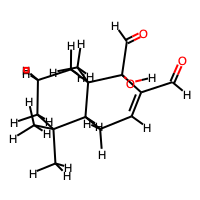

In [350]:
seok_train_df.head(1)

In [449]:
merged_df = seok_train_df.merge(df_final, how = 'inner', left_on='value_str', right_on='target1_str')

In [456]:
merged_df.groupby('Solvent1').count().sort_values(by=['nmrshiftdb2 ID'], ascending = False).head(10).reset_index()

,Solvent1,molecule_id,rdmol,spectra_ids,value,value_str,nmrshiftdb2 ID,SMILES,Temp1,Molecule,target1,target2,target3,target4,target1_str
0,Unreported,18404,18404,18404,18404,18404,18404,18404,18404,18404,18404,766,78,10,18404
1,Chloroform-D1 (CDCl3),1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,324,85,20,1179
2,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",241,241,241,241,241,241,241,241,241,241,73,15,0,241
3,Methanol-D4 (CD3OD),146,146,146,146,146,146,146,146,146,146,16,6,0,146
4,Acetone-D6 ((CD3)2CO),88,88,88,88,88,88,88,88,88,88,13,1,1,88
5,Unknown,65,65,65,65,65,65,65,65,65,65,15,5,1,65
6,Pyridin-D5 (C5D5N),35,35,35,35,35,35,35,35,35,35,3,0,0,35
7,Benzene-D6 (C6D6),34,34,34,34,34,34,34,34,34,34,10,3,1,34
8,TETRACHLORO-METHANE (CCl4),25,25,25,25,25,25,25,25,25,25,16,3,1,25
9,Deuteriumoxide (D2O),24,24,24,24,24,24,24,24,24,24,6,2,0,24


In [455]:
merged_df.groupby('Temp1').count().sort_values(by=['nmrshiftdb2 ID'], ascending = False).head(10).reset_index()

,Temp1,molecule_id,rdmol,spectra_ids,value,value_str,nmrshiftdb2 ID,SMILES,Solvent1,Molecule,target1,target2,target3,target4,target1_str
0,Unreported,18804,18804,18804,18804,18804,18804,18804,18804,18804,18804,799,81,11,18804
1,298,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,301,63,14,1030
2,Unknown,204,204,204,204,204,204,204,204,204,204,25,5,1,204
3,313,171,171,171,171,171,171,171,171,171,171,118,51,8,171
4,300,22,22,22,22,22,22,22,22,22,22,3,0,0,22
5,303,14,14,14,14,14,14,14,14,14,14,2,2,0,14
6,294,14,14,14,14,14,14,14,14,14,14,0,0,0,14
7,297,11,11,11,11,11,11,11,11,11,11,6,1,0,11
8,295,9,9,9,9,9,9,9,9,9,9,0,0,0,9
9,310,6,6,6,6,6,6,6,6,6,6,0,0,0,6


In [451]:
len(merged_df)

20301

In [457]:
spect_dict = {}
avg_spectra = []
for index, row in merged_df.iterrows():
    targets = ['target1', 'target2', 'target3', 'target4']
    c = 0
    for t in targets:
        if type(row[t]) == dict:
            c += 1
            row[t].
    spect_dict[row['nmrshiftdb2 ID']] = c

In [458]:
len(spect_dict)

20207

In [460]:
spect_count = {}
for i in spect_dict:
    if spect_dict[i] not in spect_count:
        spect_count[spect_dict[i]]=1
    else: 
        spect_count[spect_dict[i]]+=1

In [461]:
spect_count

{1: 19041, 2: 975, 3: 158, 4: 33}

In [465]:
spect_count.values()

dict_values([19041, 975, 158, 33])

In [466]:
test_dict = {1:1, 2:2, 3:3, 4:4}

In [469]:
list(spect_count.values())+list(test_dict.values())

[19041, 975, 158, 33, 1, 2, 3, 4]

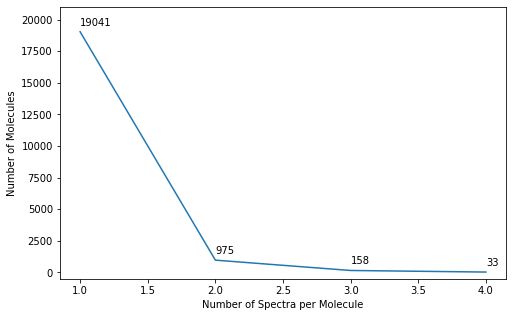

In [463]:
import matplotlib.pyplot as plt
x, y = list(spect_count.keys()), list(spect_count.values())
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.xlabel('Number of Spectra per Molecule')
plt.ylabel('Number of Molecules')
plt.ylim((-500,21000))
for i,j in zip(x,y):
    plt.annotate(j, (i, j+500))
plt.show()

In [355]:
merged_df_final = merged_df[['molecule_id', 'rdmol', 'Solvent1', 'Temp1', 'value']]

In [378]:
len(merged_df_final)

20301

In [14]:
merged_df_final.head(1)['value']

NameError: name 'merged_df_final' is not defined

In [665]:
len(merged_df_final)

20301

In [673]:
len(merged_df_final[(merged_df_final['Solvent1'] != 'Unreported')])

1897

In [671]:
len(merged_df_final[merged_df_final['Temp1'] != 'Unreported'])

1497

In [677]:
solvs_df = merged_df_final[(merged_df_final['Solvent1'] != 'Unreported') & (merged_df_final['Temp1'] != 'Unreported')]
temps_df = merged_df_final[(merged_df_final['Temp1'] != 'Unreported')]

In [678]:
len(solvs_df)

1478

### Duplicate rows examination

In [382]:
g = merged_df_final.groupby('molecule_id').count().sort_values(by=['molecule_id'], ascending = False).reset_index()[['molecule_id', 'value']]

In [383]:
g.head()

,molecule_id,value
0,44696,1
1,44695,1
2,44693,1
3,44692,1
4,44689,1


In [385]:
dups = merged_df_final.merge(g[g['value']>1], how = 'inner', on = 'molecule_id')

,molecule_id,rdmol,Solvent1,Temp1,value_x,value_y
0,4045,,Acetone-D6 ((CD3)2CO),298,"{0: 142.1, 1: 129.1, 2: 128.6, 3: 128.4, 4: 12...",2
1,4045,,Acetone-D6 ((CD3)2CO),298,"{0: 142.1, 1: 129.1, 2: 128.6, 3: 128.4, 4: 12...",2
2,4059,,Chloroform-D1 (CDCl3),298,"{0: 132.5, 1: 134.4, 2: 39.7, 3: 144.8, 4: 143...",2
3,4059,,Chloroform-D1 (CDCl3),298,"{0: 132.5, 1: 134.4, 2: 39.7, 3: 144.8, 4: 143...",2
4,4242,,Chloroform-D1 (CDCl3),298,"{0: 112.2, 1: 121.7, 3: 153.0, 4: 177.7, 6: 15...",2
...,...,...,...,...,...,...
188,43153,,Unreported,Unreported,{0: 44.3},2
189,44009,,Unreported,Unreported,"{0: 130.3, 1: 123.3, 2: 127.2, 3: 118.1, 4: 15...",2
190,44009,,Unreported,Unreported,"{0: 130.3, 1: 123.3, 2: 127.2, 3: 118.1, 4: 15...",2
191,44383,,Unreported,Unreported,"{0: 109.4, 1: 122.0, 2: 122.0, 3: 109.4, 4: 13...",2

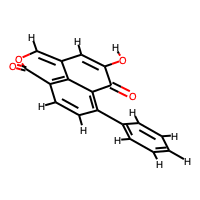
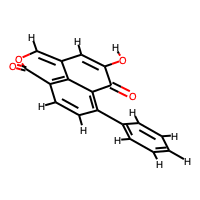
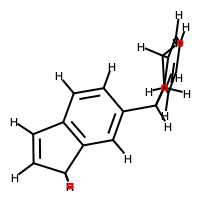
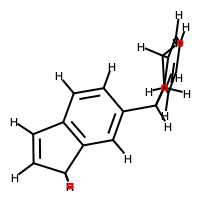
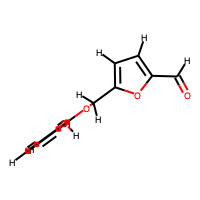
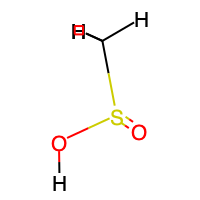
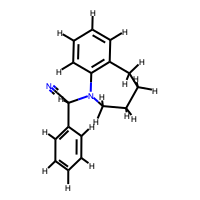
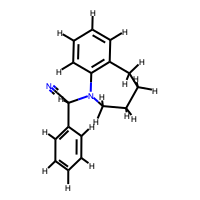
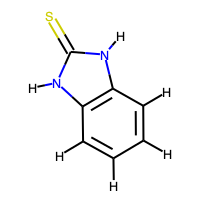
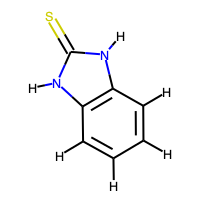

In [386]:
dups

### Examining multiple spectra

In [491]:
len(multiple_spectra)

1837

In [492]:
multiple_spectra.head(1)

,Temperature [K],nmrshiftdb2 ID,Field Strength [MHz],Spectrum 13C 0,Spectrum 13C 1,Spectrum 13C 2,Spectrum 13C 3,Solvent,ID,SMILES,...,Temp3,Temp4,Solvent1,Solvent2,Solvent3,Solvent4,target1,target2,target3,target4
15,0:293 1:Unreported,2203,0:75 1:Unreported,46.4;0.0T;11|50.4;0.0T;13|58.5;0.0T;3|69.0;0.0...,46.6;0.0T;11|50.4;0.0T;13|58.5;0.0T;3|69.0;0.0...,NaN,NaN,"0:Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO) 1:Un...","(5-Furan-2-ylmethyl-6-thioxo-[1,3,5]thiadiazin...",[O]C(=O)[C]N1[C]SC(=S)N([C]c2[c][c][c]o2)[C]1,...,293,293,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,Unreported,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....",None,None


In [493]:
for i in multiple_spectra:
    print(i)

Temperature [K]
nmrshiftdb2 ID
Field Strength [MHz]
Spectrum 13C 0
Spectrum 13C 1
Spectrum 13C 2
Spectrum 13C 3
Solvent
ID
SMILES
Molecule
Temp1
Temp2
Temp3
Temp4
Solvent1
Solvent2
Solvent3
Solvent4
target1
target2
target3
target4


In [507]:
multiple_spectra['target1_str'] = [str(i) for i in multiple_spectra['target1'].tolist()]

In [508]:
multiple_spectra = multiple_spectra[['nmrshiftdb2 ID','Temp1','Temp2','Temp3','Temp4','Solvent1','Solvent2','Solvent3','Solvent4','target1','target2','target3','target4','target1_str']]

In [523]:
multiple_spectra.head(3)

,nmrshiftdb2 ID,Temp1,Temp2,Temp3,Temp4,Solvent1,Solvent2,Solvent3,Solvent4,target1,target2,target3,target4,target1_str
15,2203,293,293,293,293,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,Unreported,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....",None,None,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148...."
19,2207,Unreported,Unreported,Unreported,Unreported,Unreported,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...",None,None,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12..."
28,2218,303,303,303,303,"Dimethylformamide-D7 (DMF-D7, CDON(CD3)2 )",Unreported,Unreported,Unreported,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","{0: 111.1, 1: 155.7, 3: 137.6, 5: 154.9, 7: 15...","{0: 110.9, 1: 155.5, 3: 137.4, 5: 154.6, 7: 15...",None,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15..."


In [536]:
d1 = {0: 123, 1: 234, 2:345, 3:456}
d2 = {2: 125, 7: 798, 3:456}

In [550]:
def common_entries(*dcts):
    for i in set(dcts[0]).intersection(*dcts[1:]):
        l = list(d[i] for d in dcts)
        p = round(abs(l[1]-l[0])/l[0], 4)
        yield p

In [551]:
list(common_entries(d1,d2))

[0.6377, 0.0]

In [552]:
multiple_spectra['perc_differences_per_nuc'] = [list(common_entries(row['target1'], row['target2'])) for index, row in multiple_spectra.iterrows()]

In [553]:
multiple_spectra.head(3)

,nmrshiftdb2 ID,Temp1,Temp2,Temp3,Temp4,Solvent1,Solvent2,Solvent3,Solvent4,target1,target2,target3,target4,target1_str,perc_differences_per_nuc
15,2203,293,293,293,293,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,Unreported,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....",None,None,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0043, 0...."
19,2207,Unreported,Unreported,Unreported,Unreported,Unreported,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...",None,None,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,2218,303,303,303,303,"Dimethylformamide-D7 (DMF-D7, CDON(CD3)2 )",Unreported,Unreported,Unreported,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","{0: 111.1, 1: 155.7, 3: 137.6, 5: 154.9, 7: 15...","{0: 110.9, 1: 155.5, 3: 137.4, 5: 154.6, 7: 15...",None,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","[0.0045, 0.0026, 0.0029, 0.0071, 0.0045]"


In [554]:
f = seok_train_df.merge(multiple_spectra, how = 'inner', left_on='value_str', right_on='target1_str')

In [555]:
len(f)

1259

,molecule_id,rdmol,spectra_ids,value,value_str,nmrshiftdb2 ID,Temp1,Temp2,Temp3,Temp4,Solvent1,Solvent2,Solvent3,Solvent4,target1,target2,target3,target4,target1_str,perc_differences_per_nuc
0,4016,,[16],"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....",2203,293,293,293,293,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,Unreported,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....",None,None,"{1: 69.0, 3: 58.5, 5: 191.6, 6: 143.0, 8: 148....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0043, 0...."
1,4020,,[22],"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...",2207,Unreported,Unreported,Unreported,Unreported,Unreported,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",Unreported,Unreported,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...",None,None,"{0: 152.4, 1: 127.2, 2: 129.2, 3: 127.3, 4: 12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4029,,[31],"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...",2218,303,303,303,303,"Dimethylformamide-D7 (DMF-D7, CDON(CD3)2 )",Unreported,Unreported,Unreported,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","{0: 111.1, 1: 155.7, 3: 137.6, 5: 154.9, 7: 15...","{0: 110.9, 1: 155.5, 3: 137.4, 5: 154.6, 7: 15...",None,"{0: 111.6, 1: 156.1, 3: 138.0, 5: 156.0, 7: 15...","[0.0045, 0.0026, 0.0029, 0.0071, 0.0045]"

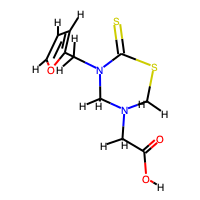
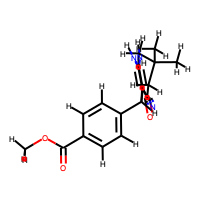
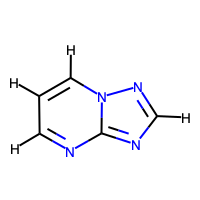

In [556]:
f.head(3)

In [633]:
diffs = []
for index, row in f.iterrows():
    for v in row['perc_differences_per_nuc']:
        diffs.append(v)

In [656]:
len(diffs)

10275

In [ ]:
diffs_dict = {}
for i in diffs:
    if i not in diffs_dict:
        diffs_dict[i] = 1
    else:
        diffs_dict[i] += 1

In [651]:
sum(diffs_dict.values())

10275

In [638]:
diffs_dict_pos = {k:v for k,v in diffs_dict.items() if k>=0}

In [639]:
diffs_dict_neg = {k:v for k,v in diffs_dict.items() if k<0}

In [640]:
{k: v for k, v in sorted(diffs_dict.items(), key=lambda item: item[1], reverse = True)}

{0.0: 2682,
 0.0008: 236,
 0.0002: 222,
 0.0001: 197,
 0.0007: 164,
 0.0003: 156,
 0.0016: 136,
 0.0004: 135,
 0.0009: 118,
 0.0006: 117,
 0.0005: 111,
 0.0015: 108,
 0.0023: 104,
 0.0017: 94,
 0.0012: 68,
 0.0013: 66,
 0.0026: 63,
 0.0014: 63,
 0.0018: 62,
 0.0011: 61,
 0.0022: 61,
 0.0031: 59,
 0.0025: 57,
 0.0039: 54,
 0.0035: 53,
 0.0036: 52,
 0.0024: 52,
 0.0047: 50,
 0.001: 50,
 0.0019: 49,
 0.002: 48,
 0.0038: 46,
 0.0029: 43,
 0.0043: 42,
 0.0055: 42,
 0.0052: 42,
 0.0027: 41,
 0.0033: 41,
 0.0042: 40,
 0.0051: 40,
 0.0034: 40,
 0.003: 39,
 0.0028: 38,
 0.0048: 38,
 0.0062: 38,
 0.004: 36,
 0.0041: 36,
 0.0045: 35,
 0.0058: 35,
 0.0068: 35,
 0.0069: 34,
 0.0065: 33,
 0.0021: 33,
 0.006: 33,
 0.0067: 33,
 0.0078: 33,
 0.0056: 33,
 0.0085: 32,
 0.0032: 32,
 0.007: 32,
 0.0105: 30,
 0.0066: 30,
 0.0049: 30,
 0.0071: 29,
 0.0046: 29,
 0.0076: 28,
 0.0101: 28,
 0.0037: 28,
 0.0088: 27,
 0.0059: 26,
 0.0063: 26,
 0.0081: 26,
 0.005: 25,
 0.0061: 25,
 0.0116: 24,
 0.0054: 24,
 0.0118:

In [641]:
vals = [0.0008,0.0002,0.0001,0.0007,0.0003,0.0004,0.0006,0.0005,0.0016,0.0009,0.0015,0.0023,0.0017,0.0014,0.0018,0.0024,0.0012,0.0013,0.0039,0.0026,0.0031,0.0047,0.0025,0.0036,0.0011,0.0022,0.001,0.004,0.0019,0.0035,0.0038,0.0033,0.0029,0.0048,0.0027,0.0041,0.002,0.0043,0.0071,0.003,0.0085,0.0055,0.0028,0.0042,0.0034,0.0065,0.0021,0.007,0.0032,0.0051,0.0062,0.0054,0.0069,0.006,0.0078,0.0046,0.0056,0.0045,0.0052,0.0049,0.0068,0.0037,0.0058,0.0057,0.0063,0.0044,0.0076,0.0066,0.0101,0.0067,0.0081,0.0089,0.005,0.0053,0.0088,0.0059,0.0061,0.0077,0.0075,0.0073,0.0105,0.0072,0.0116,0.0084,0.0074,0.0114,0.0094,0.0118,0.008,0.0087,0.0064,0.0092,0.0086,0.0095,0.011,0.013,0.0079,0.0122,0.0132,0.0096,0.0119,0.0129,0.01,0.0115,0.014]

In [642]:
high_counts = {k:v for k,v in diffs_dict.items() if k in vals}

In [643]:
high_vals = {k:v for k,v in diffs_dict.items() if k>0.01}

In [657]:
sum(high_vals.values())

2807

In [662]:
high_high_vals = {k:v for k,v in diffs_dict.items() if k>0.03}

In [663]:
sum(high_high_vals.values())

1168

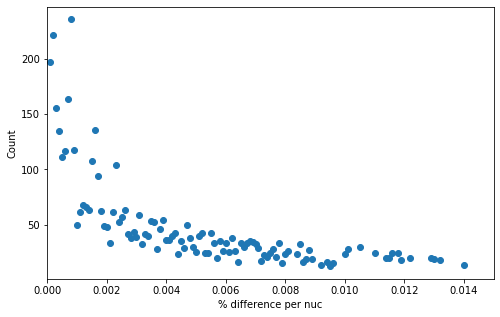

In [664]:
import matplotlib.pyplot as plt
x, y = list(high_counts.keys()), list(high_counts.values())
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.xlabel('% difference per nuc')
plt.ylabel('Count')
plt.xlim(0,0.015)
plt.show()

In [653]:
diffs_per_mol = []
for index, row in f.iterrows():
    if len(row['perc_differences_per_nuc']) > 0:
        diffs_per_mol.append(round(sum(row['perc_differences_per_nuc'])/len(row['perc_differences_per_nuc']), 4))

In [654]:
len(diffs_per_mol)

1258

In [647]:
diffs_per_mol_dict = {}
for i in diffs_per_mol:
    if i not in diffs_per_mol_dict:
        diffs_per_mol_dict[i] = 1
    else:
        diffs_per_mol_dict[i] += 1

In [655]:
sum(diffs_per_mol_dict.values())

1258

In [648]:
high_counts_per_mol = {k: v for k, v in sorted(diffs_per_mol_dict.items(), key=lambda item: item[1], reverse = True) if k != 0}

In [649]:
{k: v for k, v in sorted(diffs_per_mol_dict.items(), key=lambda item: item[1], reverse = True)}

{0.0: 197,
 0.0004: 23,
 0.0007: 22,
 0.0003: 20,
 0.0002: 20,
 0.0011: 16,
 0.0005: 15,
 0.0006: 15,
 0.0017: 15,
 0.0009: 14,
 0.0012: 13,
 0.0008: 13,
 0.0001: 12,
 0.0023: 11,
 0.0059: 11,
 0.001: 10,
 0.0021: 10,
 0.0057: 10,
 0.0014: 10,
 0.0016: 10,
 0.0013: 9,
 0.003: 9,
 0.0022: 9,
 0.0031: 8,
 0.0053: 8,
 0.0046: 8,
 0.0029: 8,
 0.0019: 8,
 0.002: 8,
 0.0138: 7,
 0.0028: 7,
 0.0041: 7,
 0.0058: 7,
 0.0052: 7,
 0.0026: 7,
 0.0033: 6,
 0.0035: 6,
 0.0027: 6,
 0.0099: 6,
 0.0037: 6,
 0.0054: 6,
 0.0034: 6,
 0.004: 6,
 0.0083: 5,
 0.0043: 5,
 0.0062: 5,
 0.0086: 5,
 0.0093: 5,
 0.0044: 5,
 0.0032: 5,
 0.0105: 5,
 0.0045: 5,
 0.0078: 5,
 0.0119: 5,
 0.0134: 5,
 0.0066: 5,
 0.0131: 4,
 0.0068: 4,
 0.009: 4,
 0.0109: 4,
 0.0056: 4,
 0.0055: 4,
 0.0126: 4,
 0.0047: 4,
 0.0024: 4,
 0.0125: 4,
 0.0074: 4,
 0.0073: 4,
 0.0101: 4,
 0.0139: 4,
 0.0048: 4,
 0.0038: 4,
 0.005: 4,
 0.0051: 4,
 0.0181: 4,
 0.0298: 4,
 0.0039: 4,
 0.0049: 4,
 0.0152: 4,
 0.0015: 4,
 0.0354: 3,
 0.0303: 3,
 0.0

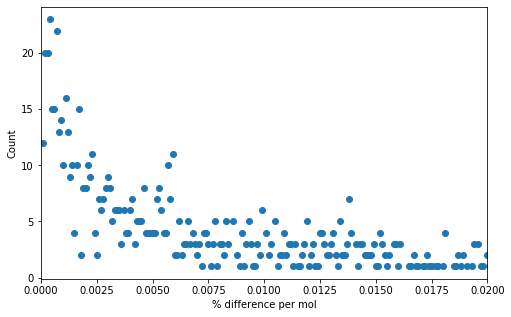

In [650]:
import matplotlib.pyplot as plt
x, y = list(high_counts_per_mol.keys()), list(high_counts_per_mol.values())
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.xlabel('% difference per mol')
plt.ylabel('Count')
plt.xlim(0,0.02)
plt.show()